In [23]:
import string
import numpy as np
import pandas as pd
%config IPCompleter.greedy=True

In [24]:
def substrings_in_string(big_string, substrings):
	for substring in substrings:
		if string.find(big_string, substring) != -1:
			return substring

def replace_titles(x):
	title = x['Title']
	if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
		return 'Mr'
	elif title in ['Countess', 'Mme']:
		return 'Mrs'
	elif title in ['Mlle', 'Ms']:
		return 'Miss'
	elif title =='Dr':
		if x['Sex']=='Male':
			return 'Mr'
		else:
			return 'Mrs'
	else:
		return title


In [25]:
train_set = pd.read_csv("datasets/train.csv")


In [37]:
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

train_set['Title'] = train_set["Name"].map(lambda x: substrings_in_string(x, title_list))
train_set['Title'] = train_set.apply(replace_titles, axis =  1)

# Turn cabin into deck

train_set.Cabin = train_set.Cabin.fillna('Unknown')    
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
train_set['Deck']=train_set['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))

ANALYZING DATA

In [27]:
############### Get some statistics #######################

############### Those who survived versus those who didn't#

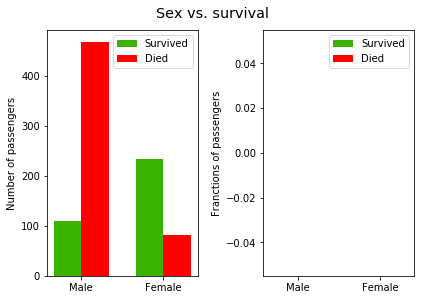

In [28]:
survived_set = train_set.loc[train_set["Survived"] == 1, :]
dead_set = train_set.loc[train_set["Survived"] == 0, :]

survived_females = survived_set.loc[survived_set["Sex"] == 'female',:]
survived_males =   survived_set.loc[survived_set["Sex"] == 'male',:]

dead_females = dead_set.loc[dead_set["Sex"] == 'female',:]
dead_males = dead_set.loc[dead_set["Sex"] == 'male',:]

smn = survived_males.shape[0]
sfn = survived_females.shape[0]
dmn = dead_males.shape[0]
dfn = dead_females.shape[0]

import matplotlib.pyplot as pp

fig, axes = pp.subplots(nrows = 1, ncols = 2)
pp.axes(axes[0])
survived = pp.bar([0.5, 3.5], [smn, sfn], width = 1, color='#3BB200')
died =  pp.bar ([1.5, 4.5], [dmn, dfn], width = 1, color= 'red')

pp.xticks([1,4], ('Male', 'Female'))
pp.ylabel('Number of passengers')
pp.legend((survived,died), ('Survived', 'Died'), loc = 0, fontsize = 'medium')
#fractions
pp.axes(axes[1])
survived_pct = pp.bar([0.5, 3.5], [smn/(smn+dmn), sfn/(sfn+dfn)], width =1, color='#3BB200')
dead_pct = pp.bar([1.5, 4.5], [dmn/(smn+dmn), dfn/(sfn+dfn)], width = 1, color='red')

pp.xticks([1,4], ('Male', 'Female'))
pp.ylabel('Franctions of passengers')
pp.legend((survived_pct,dead_pct), ('Survived', 'Died'), fontsize = 'medium')
fig.suptitle('Sex vs. survival', fontsize = 'x-large', y=1.03)
pp.tight_layout()
pp.show()

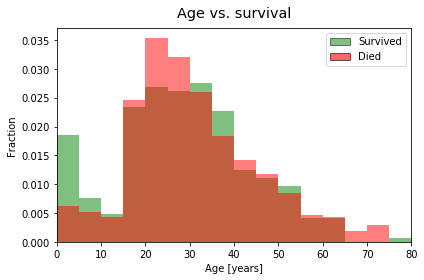

In [29]:

##################### Now Find correlation between survival and age######################
def checkNans(arr, arr2=None):
    mask_nan = pd.isnull(arr) # using pandas isnull to also operate
                              # on string fields
    if mask_nan.sum()>0:
        any_nan = True
    else:
        any_nan = False
    n_nan = mask_nan.sum()
    
    masked_arr = arr[~mask_nan]
    if arr2 is not None:
        masked_arr2 = arr2[~mask_nan]
    else: 
        masked_arr2 = None

    return any_nan, masked_arr, masked_arr2, n_nan, mask_nan

survived_age = checkNans(survived_set['Age'])[1]
dead_age = checkNans(dead_set['Age'])[1]

stacked = np.hstack((survived_age, dead_age))
bins = np.histogram(stacked, bins = 16, range = (0,stacked.max()))[1]

survived = pp.hist(survived_age, bins, normed=1, facecolor='green', alpha=0.5)
dead = pp.hist(dead_age, bins, normed=1, facecolor='red', alpha=0.5)

import matplotlib.patches as mpatches
survived_handle = mpatches.Patch(facecolor='green', alpha =0.5, label = 'Survived', edgecolor= 'black')
dead_handle = mpatches.Patch(facecolor = 'red' , alpha =0.6, label = 'Dead', edgecolor = 'black')

pp.legend((survived_handle,dead_handle), ('Survived', 'Died'), loc = 0, fontsize = 'medium')

pp.title('Age vs. survival', fontsize = 'x-large', y=1.02)
pp.xlabel('Age [years]')
pp.ylabel('Fraction')
pp.xlim([0,stacked.max()])
pp.tight_layout()
pp.show()


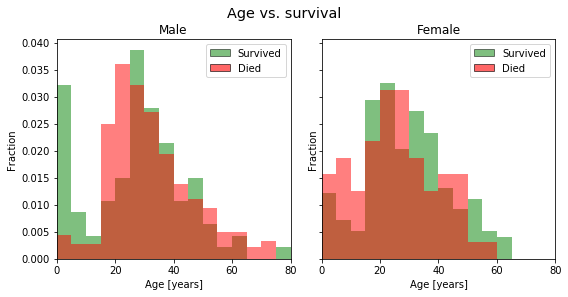

In [30]:

sma = checkNans(survived_males['Age'])[1]
dma = checkNans(dead_males['Age'])[1]
sfa= checkNans(survived_females['Age'])[1]
dfa = checkNans(dead_females['Age'])[1]

fig, axes = pp.subplots(nrows = 1, ncols = 2, figsize=(8,4), sharey= True)
pp.axes(axes[0])

survived_male = pp.hist(sma, bins, normed=1, facecolor = 'green', alpha=0.5)
dead_male = pp.hist(dma, bins, normed = 1, facecolor = 'red', alpha=0.5)

pp.legend((survived_handle,dead_handle), ('Survived', 'Died'), loc = 0, fontsize ='medium')

pp.title('Male')
pp.xlabel('Age [years]')
pp.ylabel('Fraction')
pp.xlim([0,stacked.max()]) # Using the same range as in the previous plot
pp.tight_layout()

pp.axes(axes[1])
survived_female = pp.hist(sfa, bins, normed=1, facecolor = 'green', alpha=0.5)
dead_female = pp.hist(dfa, bins, normed = 1, facecolor = 'red', alpha=0.5)

pp.legend((survived_handle,dead_handle), ('Survived', 'Died'),  fontsize ='medium')

pp.title('Female')
pp.xlabel('Age [years]')
pp.ylabel('Fraction')
pp.xlim([0,stacked.max()]) # Using the same range as in the previous plot
pp.tight_layout()

fig.suptitle('Age vs. survival', fontsize = 'x-large', y=1.02)
pp.show()

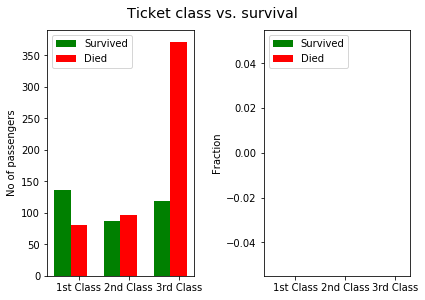

In [31]:
# CHECK CLASS NOW#

survived_c1 = survived_set['Survived'].loc[survived_set['Pclass']==1]
dead_c1 = dead_set['Survived'].loc[dead_set['Pclass']==1]

survived_c2 = survived_set['Survived'].loc[survived_set['Pclass']==2]
dead_c2 = dead_set['Survived'].loc[dead_set['Pclass']==2]

survived_c3 = survived_set['Survived'].loc[survived_set['Pclass']==3]
dead_c3 = dead_set['Survived'].loc[dead_set['Pclass']==3]

s1n = survived_c1.shape[0]
d1n = dead_c1.shape[0]
s2n = survived_c2.shape[0]
d2n = dead_c2.shape[0]
s3n = survived_c3.shape[0]
d3n = dead_c3.shape[0]

fig, axes = pp.subplots(nrows = 1, ncols = 2)

pp.axes(axes[0])
survived = pp.bar([0.5,3.5,6.5], [s1n,s2n,s3n], color ="green", width=1)
dead = pp.bar([1.5,4.5,7.5], [d1n,d2n,d3n], color ="red", width=1)

pp.xticks([1.5,4.5,7.5],('1st Class', '2nd Class', '3rd Class'))
pp.ylabel('No of passengers')
pp.legend((survived, died), ('Survived', 'Died'), loc=0, 
          fontsize = 'medium')

pp.axes(axes[1])
survived = pp.bar([0.5,3.5,6.5], [s1n/(s1n+d1n),s2n/(s2n+d2n),s3n/(s3n+d3n)], color ="green", width=1)
dead = pp.bar([1.5,4.5,7.5], [d1n/(s1n+d1n),d2n/(s2n+d2n),d3n/(s3n+d3n)], color ="red", width=1)
pp.xticks([1.5,4.5,7.5],('1st Class', '2nd Class', '3rd Class'))
pp.ylabel('Fraction')
pp.legend((survived, died), ('Survived', 'Died'), loc='upper left',
          fontsize = 'medium')
fig.suptitle('Ticket class vs. survival', fontsize = 'x-large', y=1.03)
pp.tight_layout()
pp.show()

# SIBLINGS AND FAMILY AGAINST SURVIVAL

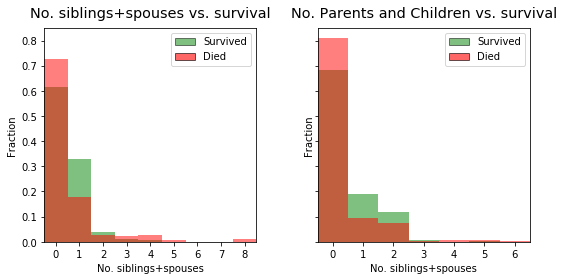

In [32]:
fig, axes = pp.subplots(nrows = 1, ncols = 2, figsize = (8,4), sharey=True)
pp.axes(axes[0])
survived_sib = survived_set['SibSp']
dead_sib = dead_set['SibSp']

#HISTOGRAM
stacked =np.hstack((survived_sib,dead_sib))
bins = np.histogram(stacked, bins=stacked.max()+1, range=(0,stacked.max()+1))[1]

survived = pp.hist(survived_sib, bins, normed =1, facecolor='green', alpha=0.5)
dead = pp.hist(dead_sib, bins, normed =1, facecolor='red',alpha=0.5)

# Plot settings
pp.legend((survived_handle, dead_handle), ('Survived', 'Died'), loc=0, 
          fontsize = 'medium') # Using the same legend handles as before
pp.title('No. siblings+spouses vs. survival', fontsize = 'x-large', y=1.02)
pp.xlabel('No. siblings+spouses')
pp.ylabel('Fraction')
pp.xticks(np.arange(train_set['SibSp'].max()+1)+0.5, 
          np.arange(train_set['SibSp'].max()+1))
pp.xlim([0,stacked.max()+1])
pp.axes(axes[1])
survived_parents = survived_set['Parch']
dead_parents = dead_set['Parch']
stacked = np.hstack((survived_parents,dead_parents))

survived = pp.hist(survived_parents, bins, normed =1, facecolor='green', alpha=0.5)
dead = pp.hist(dead_parents, bins, normed =1, facecolor='red',alpha=0.5)

# Plot settings
pp.legend((survived_handle, dead_handle), ('Survived', 'Died'), loc=0, 
          fontsize = 'medium') # Using the same legend handles as before
pp.title('No. Parents and Children vs. survival', fontsize = 'x-large', y=1.02)
pp.xlabel('No. siblings+spouses')
pp.ylabel('Fraction')
pp.xticks(np.arange(train_set['SibSp'].max()+1)+0.5, 
          np.arange(train_set['SibSp'].max()+1))
pp.xlim([0,stacked.max()+1])
pp.tight_layout()
pp.show()

Fraction of survived / died passengers within a certain bin


C:\Users\bills\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in divide
  del sys.path[0]
C:\Users\bills\Anaconda2\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in divide


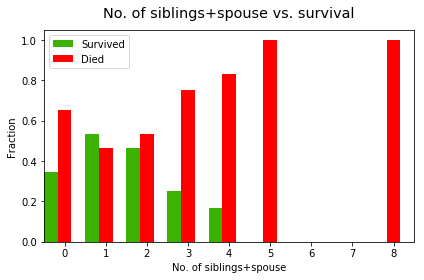

In [33]:
sibsp_classes = np.arange(train_set["SibSp"].max()+1)
sibsp_data = {'survived_n':np.array([]), 'survived_pct':np.array([]), 
              'dead_n':np.array([]), 'dead_pct':np.array([])}

for ii in sibsp_classes:
    sibsp_data["survived_"+str(ii)] = survived_set["Survived"].loc[survived_set['SibSp']==ii]
    sibsp_data["survived_n"] = np.append(sibsp_data["survived_n"], np.array(sibsp_data["survived_"+str(ii)].count()))
    sibsp_data["dead_"+str(ii)] = dead_set["Survived"].loc[dead_set['SibSp']==ii]
    sibsp_data["dead_n"] = np.append(sibsp_data["dead_n"], np.array(sibsp_data["dead_"+str(ii)].count()))
    
sibsp_data['survived_pct'] = (sibsp_data['survived_n']/  
                                              (sibsp_data['survived_n']+
                                               sibsp_data['dead_n']))
sibsp_data['survived_pct'][np.isnan(sibsp_data['survived_pct'])]=0
sibsp_data['dead_pct'] = (sibsp_data['dead_n']/  
                                              (sibsp_data['survived_n']+
                                               sibsp_data['dead_n']))
sibsp_data['dead_pct'][np.isnan(sibsp_data['dead_pct'])]=0


survived_pct = pp.bar(np.arange(train_set['SibSp'].max()+1)*3+0.5, 
                      sibsp_data['survived_pct'], width=1, color='#3BB200')
dead_pct = pp.bar(np.arange(train_set['SibSp'].max()+1)*3+1.5, 
                      sibsp_data['dead_pct'], width=1, color='red')
pp.xticks(np.arange(train_set['SibSp'].max()+1)*3+1.5, 
          np.arange(train_set['SibSp'].max()+1))
pp.xlim([0,(train_set['SibSp'].max()+1)*3])
pp.xlabel('No. of siblings+spouse')
pp.ylabel('Fraction')
leg = pp.legend((survived_pct, dead_pct), ('Survived', 'Died'), 
                fontsize = 'medium', loc='upper left')
pp.title('No. of siblings+spouse vs. survival', fontsize = 
         'x-large', y=1.03)
pp.tight_layout()
print('Fraction of survived / died passengers within a certain bin')
pp.show()


Fraction of survived / died passengers within a certain bin


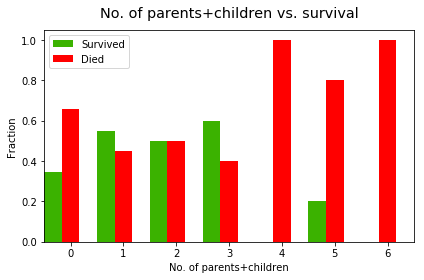

In [34]:
parch_classes = np.arange(train_set["Parch"].max()+1)
parch_data = {'survived_n':np.array([]), 'survived_pct':np.array([]), 
              'dead_n':np.array([]), 'dead_pct':np.array([])}

for ii in parch_classes:
    parch_data["survived_"+str(ii)] = survived_set["Survived"].loc[survived_set['Parch']==ii]
    parch_data["survived_n"] = np.append(parch_data["survived_n"], np.array(parch_data["survived_"+str(ii)].count()))
    parch_data["dead_"+str(ii)] = dead_set["Survived"].loc[dead_set['Parch']==ii]
    parch_data["dead_n"] = np.append(parch_data["dead_n"], np.array(parch_data["dead_"+str(ii)].count()))
    
parch_data['survived_pct'] = (parch_data['survived_n']/  
                                              (parch_data['survived_n']+
                                               parch_data['dead_n']))
parch_data['survived_pct'][np.isnan(parch_data['survived_pct'])]=0
parch_data['dead_pct'] = (parch_data['dead_n']/  
                                              (parch_data['survived_n']+
                                               parch_data['dead_n']))
parch_data['dead_pct'][np.isnan(parch_data['dead_pct'])]=0


survived_pct = pp.bar(np.arange(train_set['Parch'].max()+1)*3+0.5, 
                      parch_data['survived_pct'], width=1, color='#3BB200')
dead_pct = pp.bar(np.arange(train_set['Parch'].max()+1)*3+1.5, 
                      parch_data['dead_pct'], width=1, color='red')
pp.xticks(np.arange(train_set['Parch'].max()+1)*3+1.5, 
          np.arange(train_set['Parch'].max()+1))
pp.xlim([0,(train_set['Parch'].max()+1)*3])
pp.xlabel('No. of parents+children')
pp.ylabel('Fraction')
leg = pp.legend((survived_pct, dead_pct), ('Survived', 'Died'), 
                fontsize = 'medium', loc='upper left')
pp.title('No. of parents+children vs. survival', fontsize = 
         'x-large', y=1.03)
pp.tight_layout()
print('Fraction of survived / died passengers within a certain bin')
pp.show()

In [35]:
bins = np.append(np.arange(0,251,20), train_set["Fare"].max())

train_fare_binned = pd.cut(train_set['Fare'], bins, include_lowest=True)
train_set[["Survived"]].groupby(train_fare_binned).mean()

print('Number of passengers:\n{}'.format(train_set[
    'Fare'].groupby(train_fare_binned).count()))
print('\n')
print('Average survival:\n{}'.format(train_set[
    'Survived'].groupby(train_fare_binned).mean()))



Number of passengers:
Fare
(-0.001, 20.0]      515
(20.0, 40.0]        200
(40.0, 60.0]         54
(60.0, 80.0]         48
(80.0, 100.0]        21
(100.0, 120.0]       15
(120.0, 140.0]        7
(140.0, 160.0]        9
(160.0, 180.0]        2
(180.0, 200.0]        0
(200.0, 220.0]        4
(220.0, 240.0]        5
(240.0, 512.329]     11
Name: Fare, dtype: int64


Average survival:
Fare
(-0.001, 20.0]      0.277670
(20.0, 40.0]        0.430000
(40.0, 60.0]        0.574074
(60.0, 80.0]        0.520833
(80.0, 100.0]       0.857143
(100.0, 120.0]      0.733333
(120.0, 140.0]      0.857143
(140.0, 160.0]      0.666667
(160.0, 180.0]      1.000000
(180.0, 200.0]           NaN
(200.0, 220.0]      0.750000
(220.0, 240.0]      0.600000
(240.0, 512.329]    0.727273
Name: Survived, dtype: float64


In [38]:
print('Average survival:\n{}'.format(train_set[['Embarked',
    'Survived']].groupby('Embarked').mean()))
print('\n')

print('{}'.format(train_set[['Deck',
    'Survived']].groupby('Deck').mean()))
print('\n')

print('{}'.format(train_set[['Title',
    'Survived']].groupby('Title').mean()))

Average survival:
          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957


         Survived
Deck             
A        0.466667
B        0.744681
C        0.593220
D        0.757576
E        0.757576
F        0.583333
G        0.500000
T        0.000000
Unknown  0.299854


        Survived
Title           
Master  0.575000
Miss    0.703297
Mr      0.158192
Mrs     0.775362
